# Machine Learning

¿Qué es Machine Learning? by Andrés González. Machine Learning es una disciplina científica del ámbito de la Inteligencia Artificial que crea sistemas que aprenden automáticamente. Aprender en este contexto quiere decir identificar patrones complejos en millones de datos.

In [1]:
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


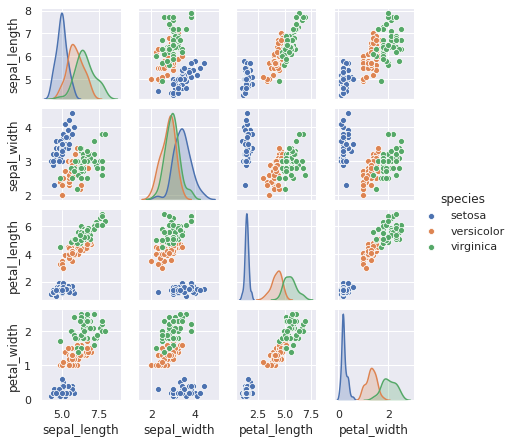

In [4]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=1.5); 

In [5]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [6]:
y_iris = iris['species']
y_iris.shape

(150,)

## Aprendizaje supervisado: Regresión lineal simple

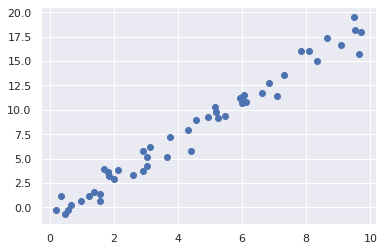

In [7]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

### 1. Elegir una clase de modelo

In [8]:
from sklearn.linear_model import LinearRegression

### 2. Elegir los hiperparámetros

In [9]:
model = LinearRegression(fit_intercept=True) # fit_intercep permite moverse en el eje y para hacer la recta desde otra y

### 3. Organizar los datos en una matriz de features y el vector target

In [10]:
X = x[:, np.newaxis] # le añadimos un dimensión, ya que necesita ser una matriz y no un array
X.shape

(50, 1)

### 4. Entrenar el modelo con los datos

In [11]:
model.fit(X, y)

LinearRegression()

In [12]:
model.coef_ # la pendiente de la recta

array([1.9776566])

In [13]:
model.intercept_ # el n de la recta

-0.9033107255311146

### 5. Precedir datos desconocidos

In [14]:
xfit = np.linspace(-1, 11)

In [15]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

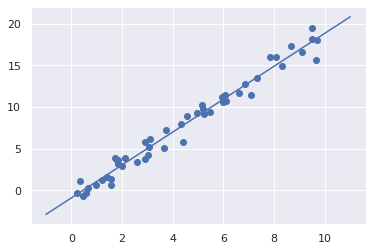

In [16]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

## Ejemplo de aprendizaje supervisado: Clasificación de los iris

Usaremos la clasificación de [Naive Bayes](https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html).

In [24]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1) #randomiza las filas para romper los sesgos si los hubiera

In [18]:
train_test_split?

Signature: train_test_split(*arrays, **options)
Docstring:
Split arrays or matrices into random train and test subsets

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

train_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the
 

In [19]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

## Ejemplo: Titanic - Gaussian

In [154]:
import numpy as np
import pandas as pd 


# leemos el csv
titanic_train = pd.read_csv('titanic-train.csv')


# definimos X_titanic

edad = titanic_train['Age']

sexo = titanic_train['Sex'].replace(['male','female'],[0,1])

clase = titanic_train['Pclass']

supervivencia = titanic_train['Survived']

X_titanic = pd.DataFrame([edad,sexo,clase,supervivencia])
X_titanic = X_titanic.T.dropna()

y_titanic = X_titanic['Survived']
X_titanic = X_titanic.drop('Survived', axis=1)


# Utilizamos Naive Bayes

from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_titanic, y_titanic,
                                                random_state=1) 


from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data


from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.770949720670391

In [281]:
# Creamos Xtest

titanic_test = pd.read_csv('titanic-test.csv')

titanic_test.Name = titanic_test.Name.str.replace(',', '')

# Eliminamos todos los "Connolly Miss. Kate" y "Kelly Mr. James"

titanic_test.Name.where(titanic_test.Name == "Connolly Miss. Kate").dropna() # 6
titanic_test= titanic_test.drop(6) # desechamos la filas

titanic_test.Name.where(titanic_test.Name == "Kelly Mr. James").dropna() # 0
titanic_test = titanic_test.drop(0) # desechamos la fila

edad = titanic_test['Age']

sexo = titanic_test['Sex'].replace(['male','female'],[0,1])

clase = titanic_test['Pclass']


Xtest = pd.DataFrame([edad,sexo,clase])
Xtest = Xtest.T.dropna()

yfit = model.predict(Xtest)

# len(yfit) es 330

In [292]:
# cargamos los datos del total.csv

total =  pd.read_csv('titanic.csv.1') # total tiene 2 duplicados

# Eliminamos todos los "Connolly Miss. Kate" y "Kelly Mr. James"

total.name.where(total.name == "Connolly Miss. Kate").dropna() # 1055 y 1064
total.name = total.name.drop(1055).drop(1064)

total.name.where(total.name == "Kelly Mr. James").dropna() # 4 y 371
total.name = total.name.drop(371).drop(4)


#creamos total_limpio, dejando solo las columnas que nos interesan (name, sex, pclass y survived)

name_l = total['name']
pclass_l = total['pclass']
sex_l = total['sex']
survived_l = total['survived']

total_limpio = pd.DataFrame([name_l, pclass_l, sex_l, survived_l]).T.dropna()


# hacer el join entre el test y el total

df3 = pd.merge(total_limpio, titanic_test, left_on="name", right_on="Name")

# df3 tiene 329 filas

name1 = df3['name']
sex1 = sexo = df3['Sex'].replace(['male','female'],[0,1])
pclass = df3['pclass']
survived = df3['survived']

df4 = pd.DataFrame([name1,sex1,pclass,survived]).T
# df4 tiene 329 filas

df4['y_survived'] = yfit
# da error xq df4 tiene 329 y "yfit" tiene 330


# ser = df4['y_survived'] == df4['survived']


# ser.name = 'iguales'
# ser.value_counts()

ValueError: Length of values does not match length of index